In [5]:
%config Completer.use_jedi = False
import os, mne
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import gridspec
import seaborn as sns
from datetime import datetime
from tqdm.notebook import tqdm
import json
from scipy import stats
from copy import deepcopy

plt.rc('text', usetex=True) 

font = {'family' : 'serif',
        'size'   : '20',
        'serif' : ['Computer Modern'],
        'sans-serif' : ['Computer Modern']}  

plt.rc('font', **font)
plt.rc('axes', titlesize=28, labelsize=20)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)  

save_dir = 'C:/Users/andersgm/Documents/Courses/02466 Project work F21/Project/Plots/'

#sns.set_style("whitegrid")

In [6]:
label_dict = {'chew': 0, 'elpp': 1, 'eyem': 2, 'musc': 3, 'shiv': 4, 'null': 5}
color_dict = {0: "#f5cf40", 1: "#e63f47", 2: "#0ed280", 3: "#fc7323", 4: "#79218f", 5: "#828bf2"} 
names = list(label_dict.keys())

In [7]:
df = pd.read_pickle("dataframe_float32.pkl")
ypreds = np.load("predictions_LDA_4_5_5_5_55784899_08-06-21_01-03-16.npy")

In [8]:
ypred = stats.mode(ypreds, axis=0).mode[0]

In [9]:
def clean(a):
    a = deepcopy(a)
    
    for n in range(1, 2):
        for i in range(n+1, len(a)-n*2-1):
            if np.all(a[i-n-1:i] == a[i-n-1]) and np.all(a[i-n-1] == a[i+n:i+2*n+1]):
                a[i:i+n] = a[i-n-1]
            
    for n in range(4, 7):
        mask = np.zeros(len(a))
        for i in range(len(a)-n):
            if np.all(a[i:i+n] == a[i]):
                mask[i:i+n] = True
                
        for i in range(len(a)):
            if not mask[i]:
                a[i] = 5
                
    for n in range(4, 7):
        mask = np.zeros(len(a))
        for i in range(len(a)-n):
            if np.all(a[i:i+n] == a[i]):
                mask[i:i+n] = True
                
        for i in range(len(a)):
            if not mask[i]:
                a[i] = 5   
                
    return a

def clean2(a):
    a = deepcopy(a)
    for n in range(2, 5):
        for i in range(n+1, len(a)-n*2-1):
            if np.all(a[i-n-1:i] == a[i-n-1]) and np.all(a[i-n-1] == a[i+n:i+2*n+1]):
                a[i:i+n] = a[i-n-1]

    for n in range(4, 20):
        mask = np.zeros(len(a))
        for i in range(len(a)-n):
            if np.all(a[i:i+n] == a[i]):
                mask[i:i+n] = True

        for i in range(len(a)):
            if not mask[i]:
                a[i] = 5
            
    return a


hex_to_rgb = lambda s: [int(s[1:3], 16), int(s[3:5], 16), int(s[5:7], 16)] 
def plot_artifacts(ax, y, dataframe):
    image = []
    for label in y:
        image.append(hex_to_rgb(color_dict[label]))
    image = np.array(image)
    image = np.expand_dims(image, 0)
    image = np.tile(np.repeat(image, 2, axis=1), (1, 1, 1))
    ax.set_yticks([])
    ax.imshow(image, interpolation='none', extent=(0, len(y)/4, 0, len(y)/4*(1/10)))

In [6]:
cherry_picked_patients = ["00000254_s005_t000", "00009320_s001_t000", "00010024_s001_t000", "00009335_s002_t000", "00009485_s001_t000", "00008476_s001_t000", "00005740_s003_t000", "00003367_s003_t001", "00008723_s001_t000"]
p_index = 0

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


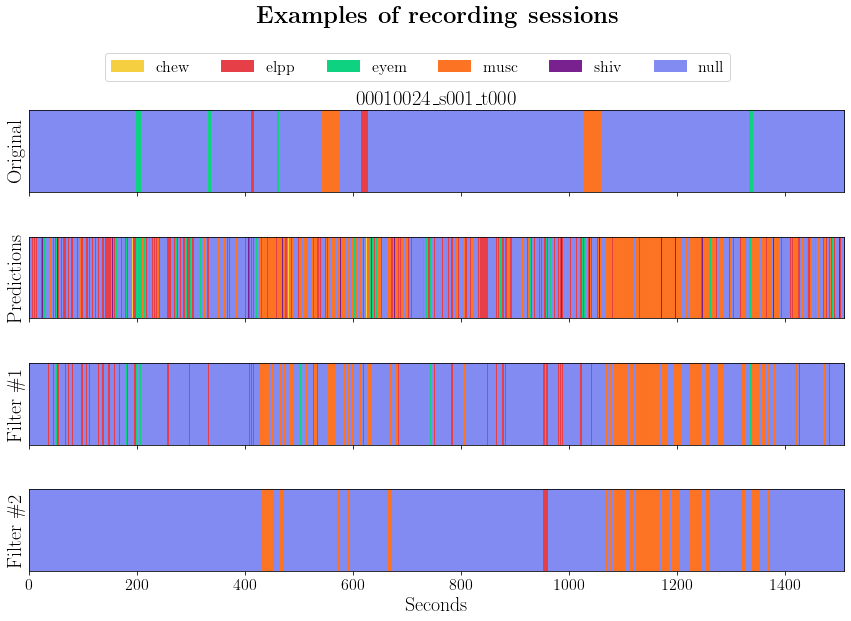

In [9]:
patient_name = np.random.choice( np.unique(df["Name"]))

#patient_name = cherry_picked_patients[p_index]
p_index += 1
patient = deepcopy(df[df["Name"] == patient_name])
patient = patient.sort_values(by="Start", ascending=True, key=lambda col: col.values).reset_index(drop=True)

prediction = ypred[patient["index"].values]

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(12,8), sharex=True)

plot_artifacts(ax[0], patient["Multiclass label"], patient)
ax[0].set_ylabel("Original")
plot_artifacts(ax[1], prediction, patient)
ax[1].set_ylabel("Predictions")
plot_artifacts(ax[2], clean(prediction), patient)
ax[2].set_ylabel(r"Filter \#1")
plot_artifacts(ax[3], clean2(prediction), patient)
ax[3].set_ylabel(r"Filter \#2")


ax[0].title.set_text("{\\huge %s" % (patient_name.replace("_", "\\_")))

ax[3].set_xlabel("Seconds")    
plt.subplots_adjust(left=0.0,
                    bottom=0.0, 
                    right=1.0, 
                    top=0.80, 
                    wspace=0.4, 
                    hspace=0.55)
handles = []
for i in range(6):
    handles.append(mpatches.Patch(color=color_dict[i], label=names[i]))

ax[0].legend(handles=handles, ncol=6, bbox_to_anchor=(0.87, 1.8)) 

plt.suptitle(r"\textbf{Examples of recording sessions}")
plt.show()

In [ ]:
def plot_artifacts(ax, y, dataframe):
    image = []
    for label in y:
        image.append(hex_to_rgb(color_dict[label]))
    image = np.array(image)
    image = np.expand_dims(image, 0)
    image = np.tile(np.repeat(image, 2, axis=1), (1, 1, 1))
    ax.set_yticks([])
    ax.imshow(image, interpolation='none', extent=(0, len(y)/4, 0, len(y)/4*(1/3.5)))

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8,8), sharex=True)

plot_artifacts(ax[0], patient["Multiclass label"], patient)
ax[0].set_ylabel("Original", size=26)
plot_artifacts(ax[1], prediction, patient)
ax[1].set_ylabel("Predictions", size=26)
plot_artifacts(ax[2], filtered_prediction, patient)
ax[2].set_ylabel(r"Postfiltering", size=26)


ax[0].title.set_text("{\\Huge %s" % (patient_name.replace("_", "\\_")))

ax[2].set_xlabel("Seconds")    
plt.subplots_adjust(left=0.0,
                    bottom=0.0, 
                    right=1.0, 
                    top=1.0, 
                    wspace=0.4, 
                    hspace=0.1)
handles = []
for i in range(6):
    handles.append(mpatches.Patch(color=color_dict[i], label=names[i]))

plt.savefig(save_dir + "figure1_postfiltering.png", dpi=250, bbox_inches = 'tight')
plt.show()

In [29]:
patient_name

'00005740_s003_t000'

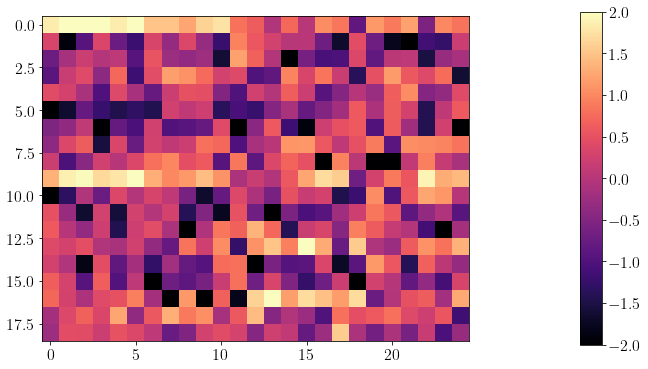

In [37]:
#patient_name = "00005740_s003_t000"
#p_index += 1
patient = deepcopy(df[df["Name"] == patient_name])
patient = patient.sort_values(by="Start", ascending=True, key=lambda col: col.values).reset_index(drop=True)

fig, ax = plt.subplots(1, 1, sharey=True, sharex=True, figsize=(10,6))
fig.tight_layout()

x =  patient["Window"][1580]

im = ax.imshow(x, cmap="magma")
im.set_clim(-2, 2)

cbar_ax = fig.add_axes([0.95, 0.09, 0.03, 0.77])
fig.colorbar(im, cax=cbar_ax)

plt.subplots_adjust(left=None, bottom=None, right=0.93, top=0.85, wspace=None, hspace=.3)
plt.show()

# Raw results

In [10]:
from sklearn.metrics import *

In [11]:
result_files = []

for root, dirs, files in os.walk(r"C:\Users\andersgm\Documents\Courses\02466 Project work F21\Project\Final results\Raw"):
    for file in files:
        if file.endswith(".npy"):
             result_files.append(root + "\\" + file)

In [65]:
ytrue = np.load("multiclass_y_new.npy")

In [ ]:
current = 0

In [58]:
ypred = np.load(result_files[0])
title = result_files[0].split("\\")[-1].split("_")
title = name[1] + " " + name[2]

In [71]:
ypred1 = stats.mode(ypred, axis=0).mode[0]

In [86]:
fbeta_score(ytrue, ypred1, beta=2, average="weighted")

0.311251420994206

In [82]:
print(classification_report(np.tile(ytrue, 5), ypred.flatten(), target_names=list(label_dict.keys())))

              precision    recall  f1-score   support

        chew       0.05      0.30      0.08     58190
        elpp       0.03      0.22      0.05     59855
        eyem       0.04      0.83      0.09    161845
        musc       0.02      0.18      0.04    103400
        shiv       0.02      0.25      0.04     30875
        null       0.98      0.29      0.44   6516350

    accuracy                           0.30   6930515
   macro avg       0.19      0.34      0.12   6930515
weighted avg       0.93      0.30      0.42   6930515



In [81]:
print(classification_report(ytrue, ypred1, target_names=list(label_dict.keys())))

              precision    recall  f1-score   support

        chew       0.04      0.23      0.07     11638
        elpp       0.03      0.23      0.05     11971
        eyem       0.04      0.83      0.08     32369
        musc       0.02      0.19      0.04     20680
        shiv       0.02      0.26      0.04      6175
        null       0.98      0.28      0.43   1303270

    accuracy                           0.29   1386103
   macro avg       0.19      0.34      0.12   1386103
weighted avg       0.93      0.29      0.41   1386103



In [78]:
ypred1

array([5, 0, 0, ..., 3, 3, 3], dtype=int64)

# Filtering results

In [12]:
def filtering(y, df):
    yfiltered = np.empty(len(y))
    for session_name in tqdm(np.unique(df["Name"])):
        idxs = df[df["Name"] == session_name].sort_values(by="Start", ascending=True, key=lambda col: col.values)["index"].values
        yfiltered[idxs] = clean2(y[idxs])
    return yfiltered

In [21]:
for file in tqdm(result_files[-4:]):
    out_name = file.replace("Raw", "Filtered").replace(".npy", "_filtered.npy")
    ypred = np.load(file)
    for i in tqdm(range(5)):
        ypred[i] = filtering(ypred[i], df)
    np.save(out_name, ypred)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/302 [00:00<?, ?it/s]

  0%|          | 0/302 [00:00<?, ?it/s]

  0%|          | 0/302 [00:00<?, ?it/s]

  0%|          | 0/302 [00:00<?, ?it/s]

  0%|          | 0/302 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/302 [00:00<?, ?it/s]

  0%|          | 0/302 [00:00<?, ?it/s]

  0%|          | 0/302 [00:00<?, ?it/s]

  0%|          | 0/302 [00:00<?, ?it/s]

  0%|          | 0/302 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/302 [00:00<?, ?it/s]

  0%|          | 0/302 [00:00<?, ?it/s]

  0%|          | 0/302 [00:00<?, ?it/s]

  0%|          | 0/302 [00:00<?, ?it/s]

  0%|          | 0/302 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/302 [00:00<?, ?it/s]

  0%|          | 0/302 [00:00<?, ?it/s]

  0%|          | 0/302 [00:00<?, ?it/s]

  0%|          | 0/302 [00:00<?, ?it/s]

  0%|          | 0/302 [00:00<?, ?it/s]